# Недообучение и переобучение

***Цель работы***

Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).

**Задания для выполнения**

    1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
    2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
    3. Отделите целевую переменную Outcome.
    4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
    5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
    6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
    7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
    8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
    9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
    10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

### 1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [2]:
df = pd.read_csv('diabetes.csv',nrows=400)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Сделайте количественное описание датасета: число признаков, статистику по признакам.

In [3]:
df.shape

(400, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


### 3. Отделите целевую переменную Outcome.

In [5]:
target = "Outcome"

y = df[target]
X = df.drop(target, axis=1)

In [6]:
X.shape[0]

400

### 4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-score для трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)
#model = DecisionTreeClassifier(random_state=1,max_depth=4)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 1.0000
Test f1_score = 0.6269


Вывод: Модель переобучена, т.к. на обучающем наборе метрика значительно выше, чем на тестовом

### 6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

In [11]:
from sklearn.model_selection import cross_validate

cv_metrics = cross_validate(model, X, y, cv=5, scoring='f1_micro', return_train_score=True)
cv_metrics

{'fit_time': array([0.00500035, 0.00499678, 0.00704098, 0.0060842 , 0.00408363]),
 'score_time': array([0.00356531, 0.00352407, 0.00499463, 0.003546  , 0.00400639]),
 'test_score': array([0.6375, 0.7125, 0.725 , 0.625 , 0.6125]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [12]:
f1_train = cv_metrics['train_score'].mean()
f1_valid = cv_metrics['test_score'].mean()
print('Train f1-score = {:.4f}'.format(f1_train))
print('Valid f1-score = {:.4f}'.format(f1_valid))

Train f1-score = 1.0000
Valid f1-score = 0.6625


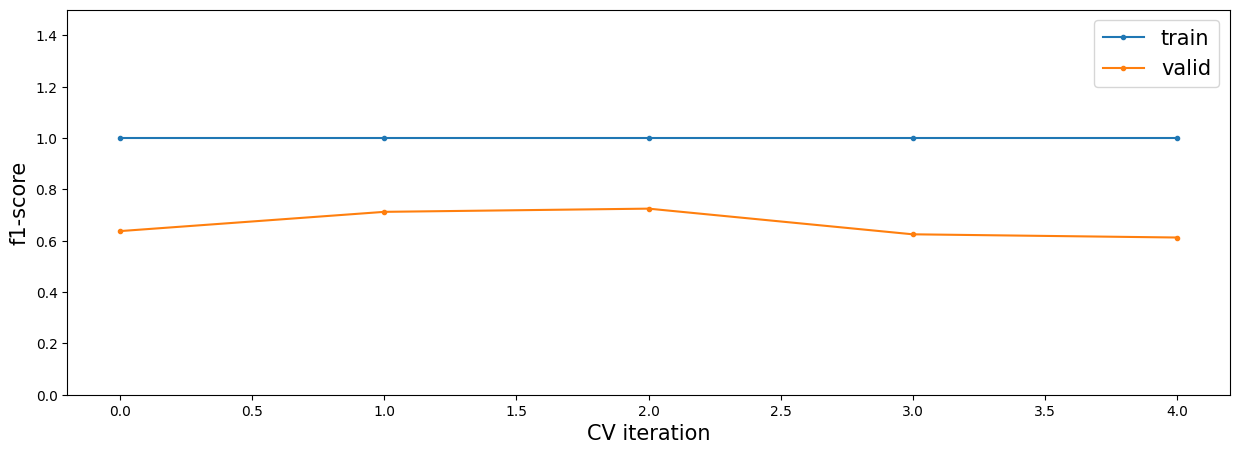

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='valid', marker='.')
plt.ylim([0., 1.5]);
plt.xlabel('CV iteration', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.legend(fontsize=15)
plt.show()

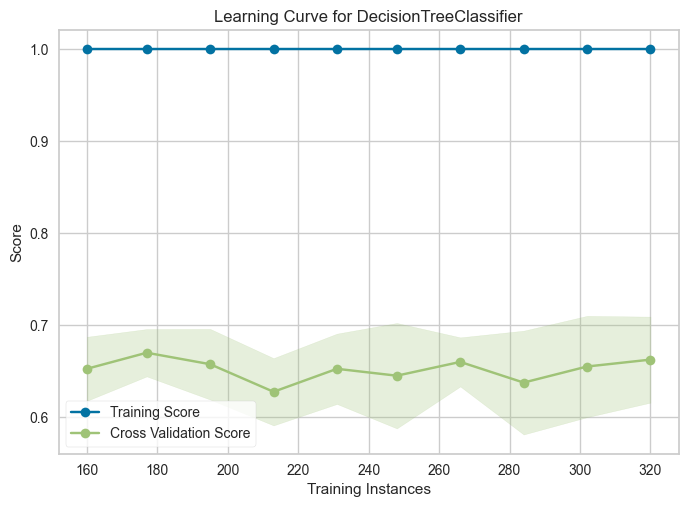

In [14]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1_micro'
).fit(X, y).show() 

### 7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

In [15]:
model = DecisionTreeClassifier(random_state=1, max_depth=3)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 0.5059
Test f1_score = 0.4783


### 8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.

In [16]:
model = DecisionTreeClassifier(random_state=1,max_depth=3)
cv_metrics = cross_validate(model, X, y, cv=5, scoring='f1_micro', return_train_score=True)
f1_train = cv_metrics['train_score'].mean()
f1_valid = cv_metrics['test_score'].mean()
print('Train f1-score = {:.4f}'.format(f1_train))
print('Valid f1-score = {:.4f}'.format(f1_valid))

Train f1-score = 0.7600
Valid f1-score = 0.7000


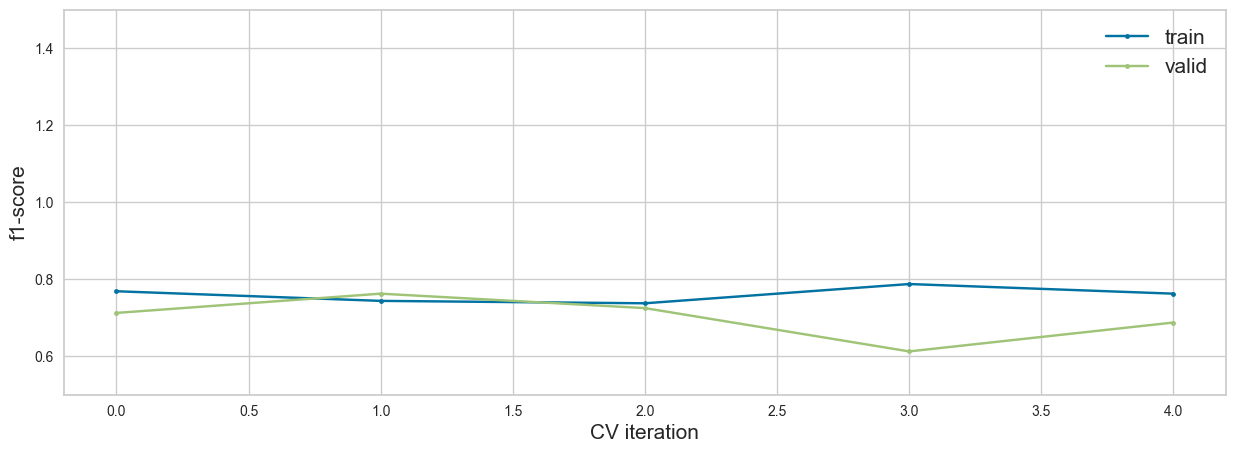

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='valid', marker='.')
plt.ylim([0.5, 1.5]);
plt.xlabel('CV iteration', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.legend(fontsize=15)
plt.show()

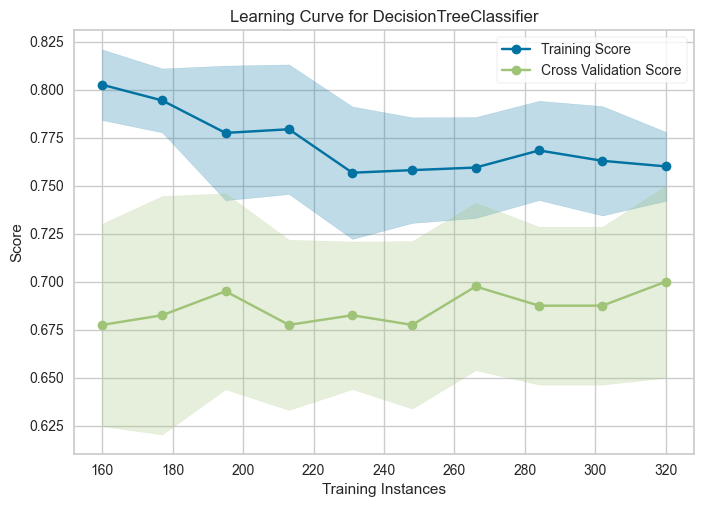

In [18]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1_micro'
).fit(X, y).show() 

### 9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [19]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [20]:
target = "Outcome"

y = df[target]
X = df.drop(target, axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 1.0000
Test f1_score = 0.6379


In [24]:
model = DecisionTreeClassifier(random_state=1)
cv_metrics = cross_validate(model, X, y, cv=5, scoring='f1_micro', return_train_score=True)
f1_valid = cv_metrics['test_score'].mean()
print('Valid f1-score = {:.4f}'.format(f1_valid))

Valid f1-score = 0.7240


#### Задания для самостоятельного выполнения

1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?
1. Повторите диагностику модели регрессии с использованием других видов моделей:
    1. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
    1. метода ближайших соседей (исследуйте влияние количества соседей)
    1. метода решающих деревьев (гиперпараметры по вашему выбору)
1. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.
1. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.
1. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.
1. Повторите анализ на других реальных датасетах из репозитория OpenML:
    - phoneme
    - banknote-authentication
    - delta_ailerons
    - mammography
    - electricity
    - mozilla4
    - kropt
    - nursery
    - volcanoes-b3


### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

Генерация синтетических данных

In [25]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

Обучение модели и предсказание значений

In [26]:
from sklearn.metrics import precision_score, recall_score

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

### F1-score

In [27]:
cv_metrics = cross_validate(model, X, y, cv=5, scoring='f1_micro', return_train_score=True)

f1_train = cv_metrics['train_score'].mean()
f1_valid = cv_metrics['test_score'].mean()
print(f'Train f1-score = {f1_train:.4f}')
print(f'Valid f1-score = {f1_valid:.4f}')

KeyboardInterrupt: 

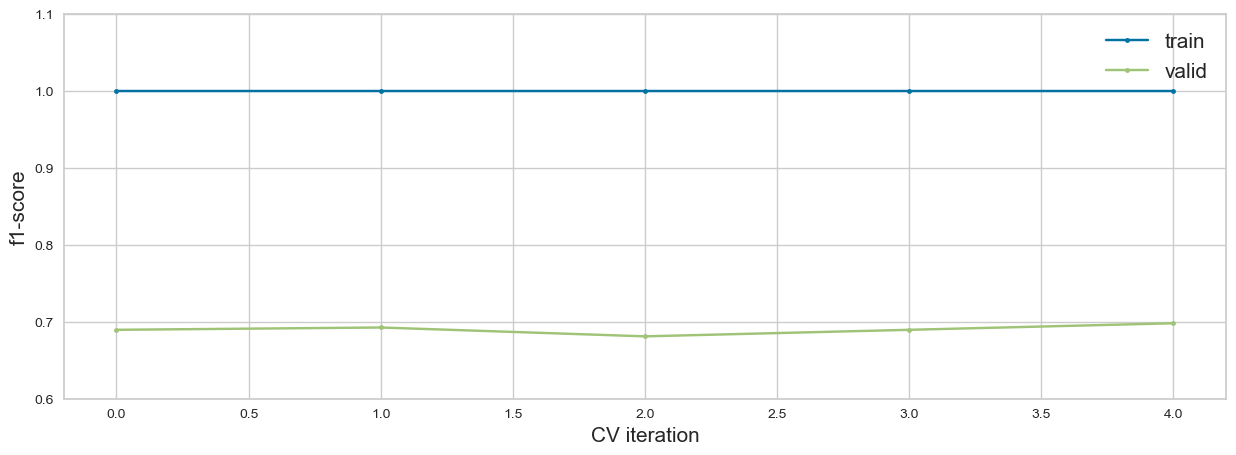

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='valid', marker='.')
plt.ylim([0.6, 1.1]);
plt.xlabel('CV iteration', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.legend(fontsize=15)
plt.show()

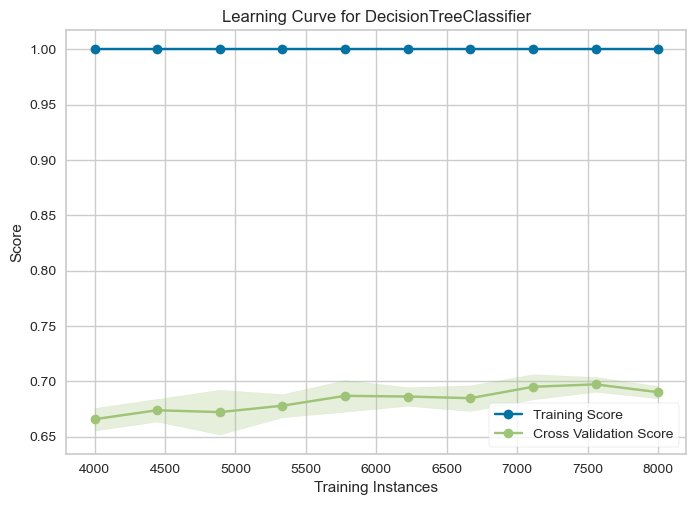

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1_micro'
).fit(X, y).show() 

### Precision

In [ ]:
cv_metrics = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)

precision_train = cv_metrics['train_score'].mean()
precision_valid = cv_metrics['test_score'].mean()
print(f'Train precision = {precision_train:.4f}')
print(f'Valid precision = {precision_valid:.4f}')

Train precision = 1.0000
Valid precision = 0.6909


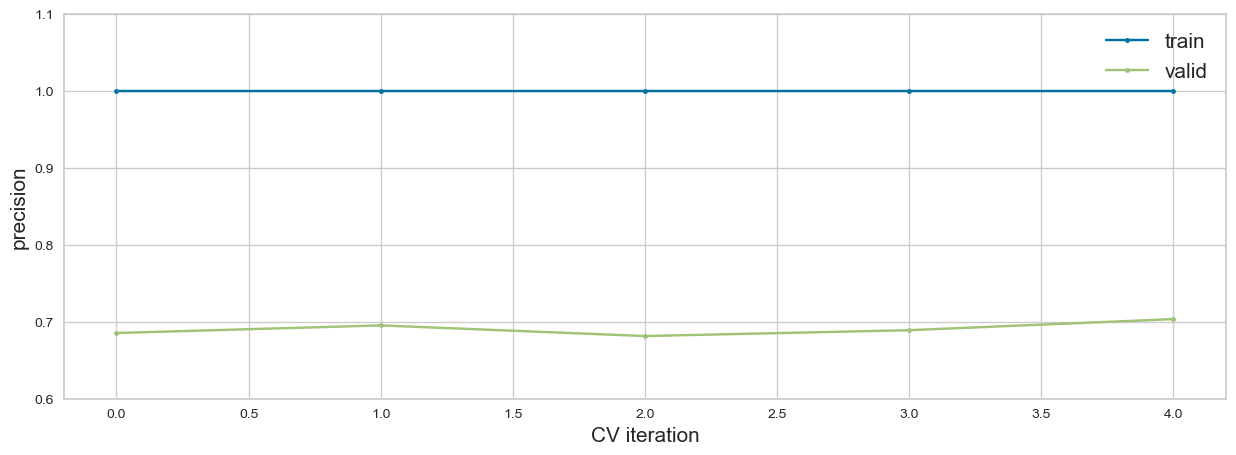

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='valid', marker='.')
plt.ylim([0.6, 1.1]);
plt.xlabel('CV iteration', fontsize=15)
plt.ylabel('precision', fontsize=15)
plt.legend(fontsize=15)
plt.show()

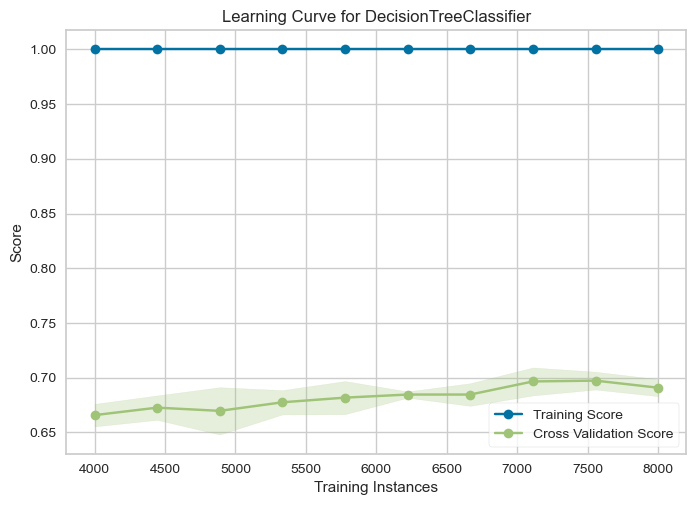

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.5, 1.0, 10), scoring='precision'
).fit(X, y).show() 

### Recall

In [ ]:
cv_metrics = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)

recall_train = cv_metrics['train_score'].mean()
recall_valid = cv_metrics['test_score'].mean()
print(f'Train recall = {recall_train:.4f}')
print(f'Valid recall = {recall_valid:.4f}')

Train recall = 1.0000
Valid recall = 0.6868


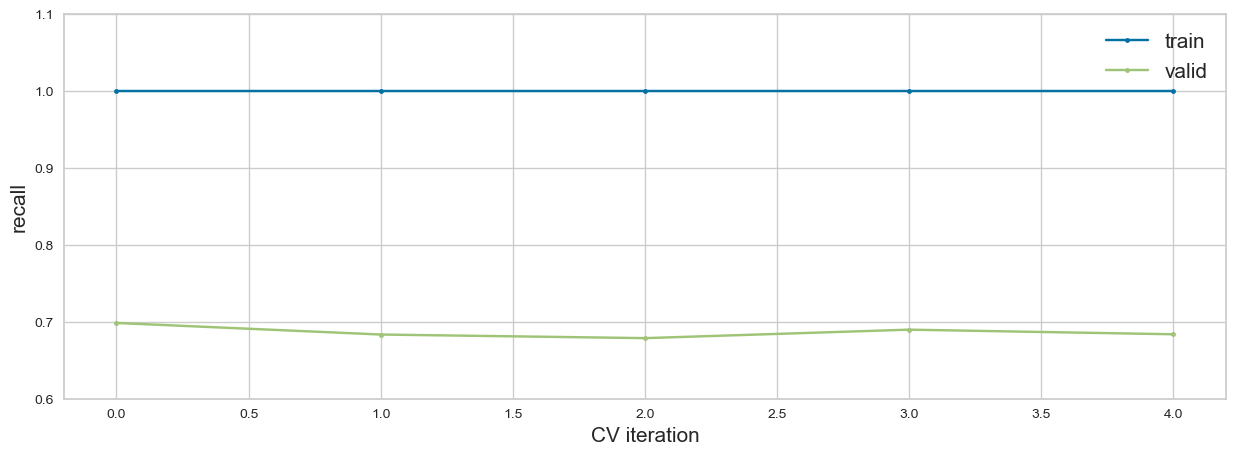

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='valid', marker='.')
plt.ylim([0.6, 1.1]);
plt.xlabel('CV iteration', fontsize=15)
plt.ylabel('recall', fontsize=15)
plt.legend(fontsize=15)
plt.show()

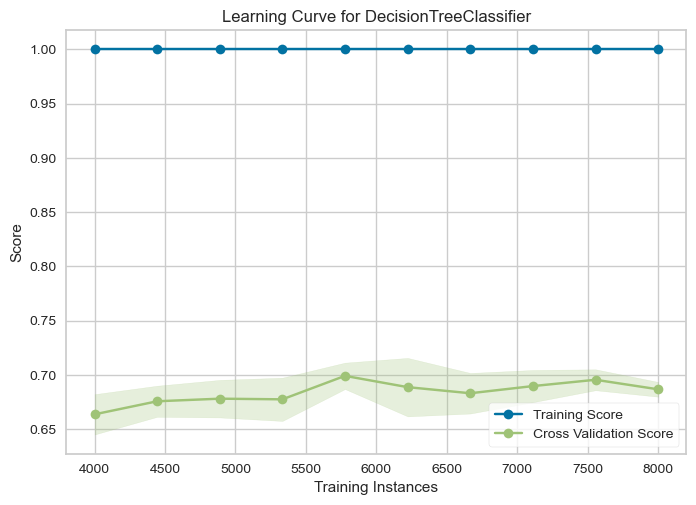

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.5, 1.0, 10), scoring='recall'
).fit(X, y).show() 

Результаты не поменялись, между собой метрики на тренировочной и тестовой выборках примерно показывают один и тот же численный результат, причём неудовлетворительный. Из-за разницы между линиями на всех графиках делаем вывод, что модель переобучена. Из-за выбора других метрик ничего не поменялось.

# 2. Повторите диагностику модели регрессии с использованием других видов моделей:
    I. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
    II. метода ближайших соседей (исследуйте влияние количества соседей)
    III. метода решающих деревьев (гиперпараметры по вашему выбору)

Загрузка данных

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

Загрузка необходимых моделей

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### Метод опорных векторов

In [ ]:
svr_model = SVR(C=5)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)

print(f"Train r2_score: {svr_model.score(X_train, y_train)}")
print(f"Test r2_score: {svr_model.score(X_test, y_test)}")

Train r2_score: 0.8258535964050722
Test r2_score: 0.642511403457251


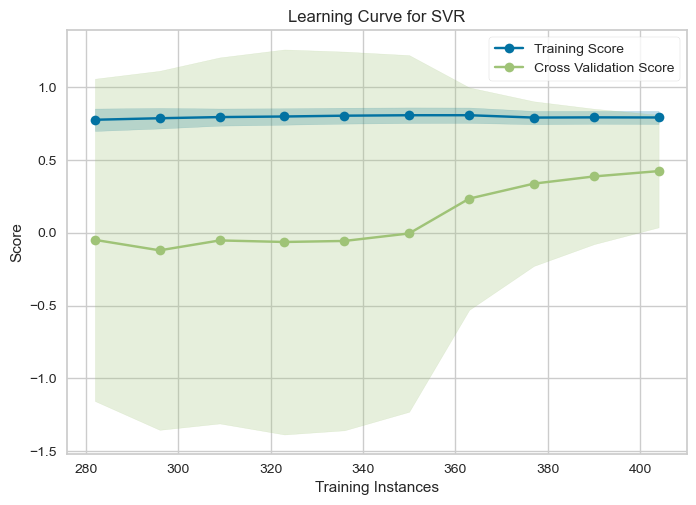

In [ ]:
visualizer = LearningCurve(
    SVR(C=5), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show() 

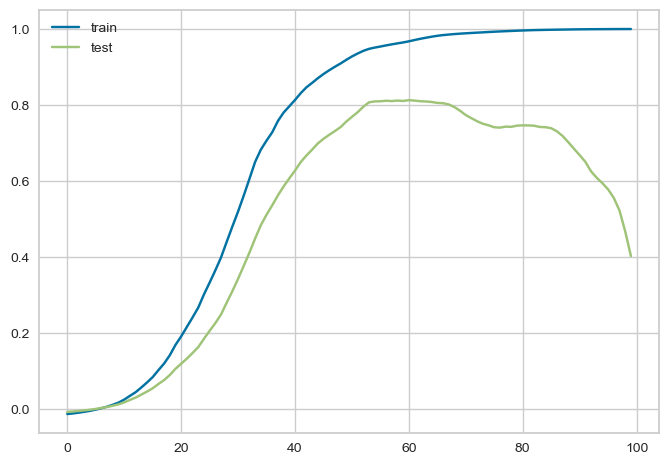

In [ ]:
trains = []
tests = []
for i in np.logspace(-3, 6, 100):
    svr_model = SVR(C=i)
    svr_model.fit(X_train, y_train)
    trains.append(svr_model.score(X_train, y_train))
    tests.append(svr_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
svr_model = SVR(C=350)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)

print(f"Train r2_score: {svr_model.score(X_train, y_train)}")
print(f"Test r2_score: {svr_model.score(X_test, y_test)}")

Train r2_score: 0.970906584627128
Test r2_score: 0.8115749068299393


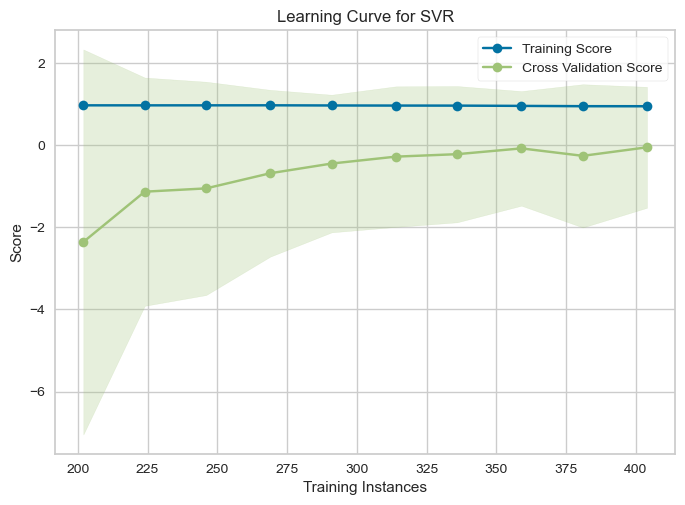

In [ ]:
visualizer = LearningCurve(
    SVR(C=350), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

#### Метод ближайших соседей

In [ ]:
knr_model = KNeighborsRegressor(n_neighbors=10)
knr_model.fit(X_train, y_train)

y_pred = knr_model.predict(X_test)
y_train_pred = knr_model.predict(X_train)

print(f"Train r2_score: {knr_model.score(X_train, y_train)}")
print(f"Test r2_score: {knr_model.score(X_test, y_test)}")

Train r2_score: 0.7497899102768965
Test r2_score: 0.5363298434811152


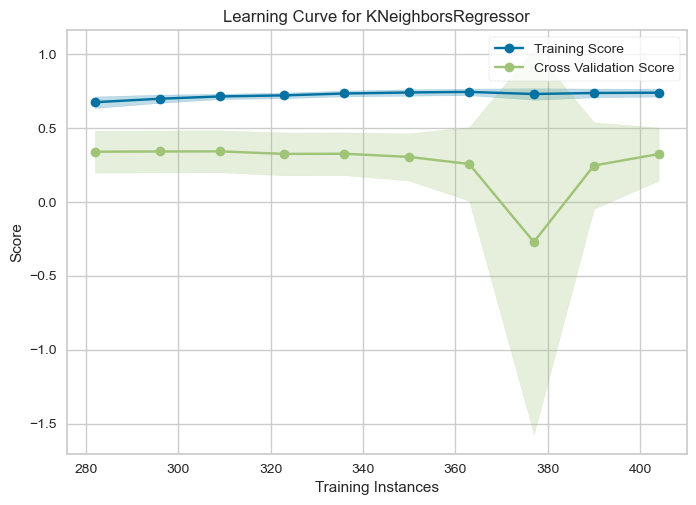

In [ ]:
visualizer = LearningCurve(
    KNeighborsRegressor(n_neighbors=10), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show() 

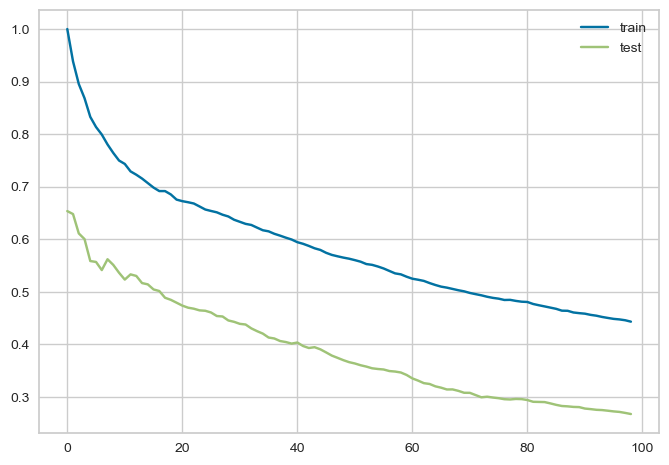

In [ ]:
trains = []
tests = []
for i in np.arange(1, 100):
    knr_model = KNeighborsRegressor(n_neighbors=i)
    knr_model.fit(X_train, y_train)
    trains.append(knr_model.score(X_train, y_train))
    tests.append(knr_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
knr_model = KNeighborsRegressor(n_neighbors=1)
knr_model.fit(X_train, y_train)

y_pred = knr_model.predict(X_test)
y_train_pred = knr_model.predict(X_train)

print(f"Train r2_score: {knr_model.score(X_train, y_train)}")
print(f"Test r2_score: {knr_model.score(X_test, y_test)}")

Train r2_score: 1.0
Test r2_score: 0.6535950313458039


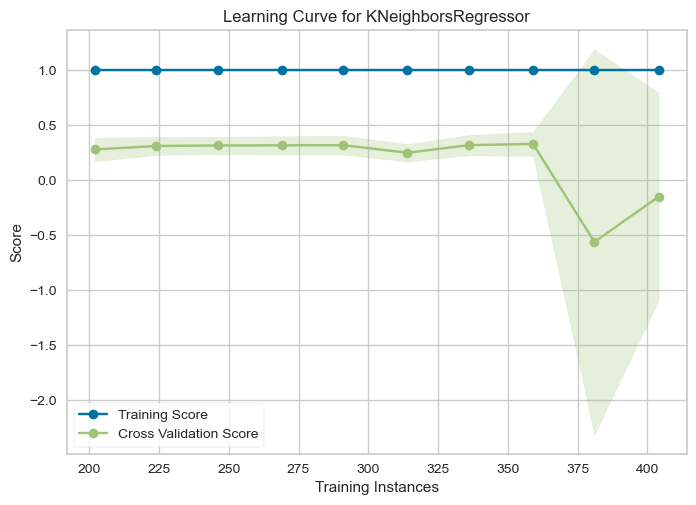

In [ ]:
visualizer = LearningCurve(
   KNeighborsRegressor(n_neighbors=1), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

#### Метод решающих деревьев (перебор max_depth)

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
y_train_pred = tree_model.predict(X_train)

print(f"Train r2_score: {tree_model.score(X_train, y_train)}")
print(f"Test r2_score: {tree_model.score(X_test, y_test)}")

Train r2_score: 0.9215375804213246
Test r2_score: 0.6743859320728177


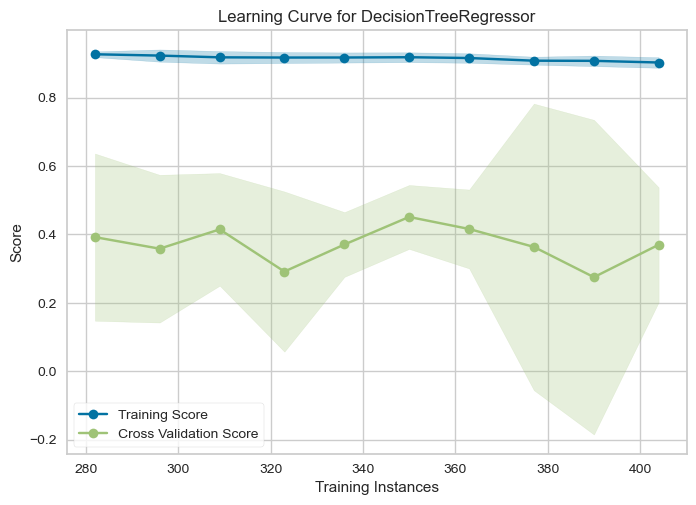

In [ ]:
visualizer = LearningCurve(
    DecisionTreeRegressor(max_depth=4), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show() 

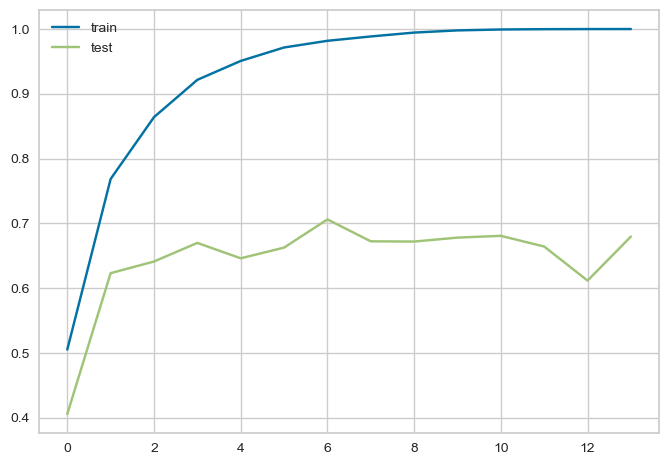

In [ ]:
trains = []
tests = []
for i in np.arange(1, 15):
    tree_model = DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train, y_train)
    trains.append(tree_model.score(X_train, y_train))
    tests.append(tree_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
y_train_pred = tree_model.predict(X_train)

print(f"Train r2_score: {tree_model.score(X_train, y_train)}")
print(f"Test r2_score: {tree_model.score(X_test, y_test)}")

Train r2_score: 0.9507293066480658
Test r2_score: 0.6430966546011618


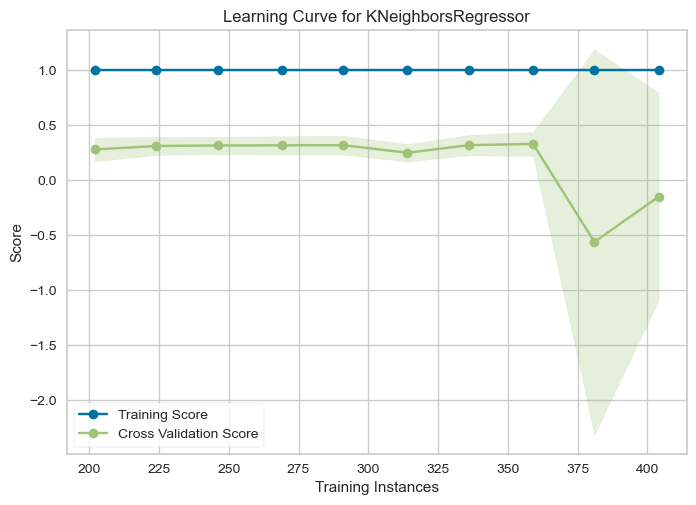

In [ ]:
visualizer = LearningCurve(
   KNeighborsRegressor(n_neighbors=1), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

print(f"Train r2_score: {lasso_model.score(X_train, y_train)}")
print(f"Test r2_score: {lasso_model.score(X_test, y_test)}")

Train r2_score: 0.8961122320864716
Test r2_score: 0.7677995670886713


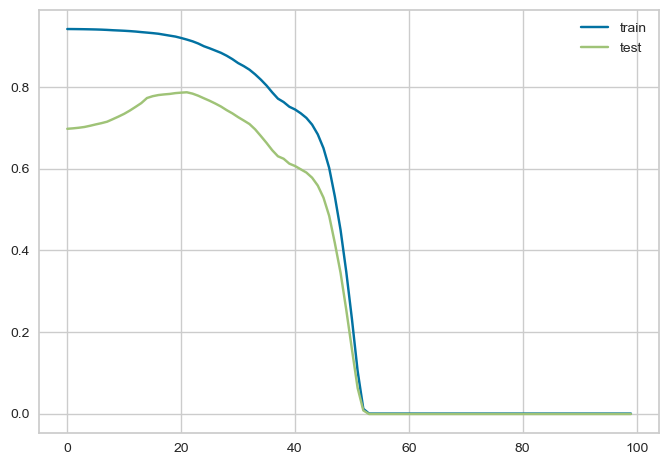

In [ ]:
trains = []
tests = []
for i in np.logspace(-4, 4, 100):
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    trains.append(lasso_model.score(X_train, y_train))
    tests.append(lasso_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

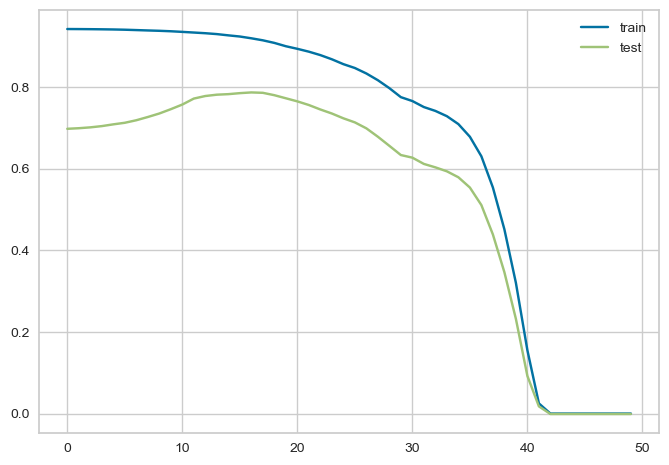

In [ ]:
trains = []
tests = []
for i in np.logspace(-4, 1, 50):
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    trains.append(lasso_model.score(X_train, y_train))
    tests.append(lasso_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

Кривая для недообученной модели($\alpha$ = 100)

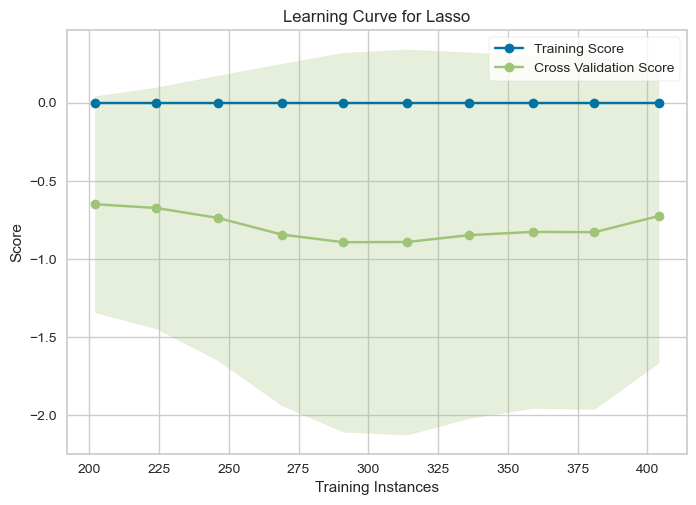

In [ ]:
visualizer = LearningCurve(
   Lasso(alpha=100), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

Кривая для переобученной модели($\alpha$ = \$4 * 10^{-4}$\)

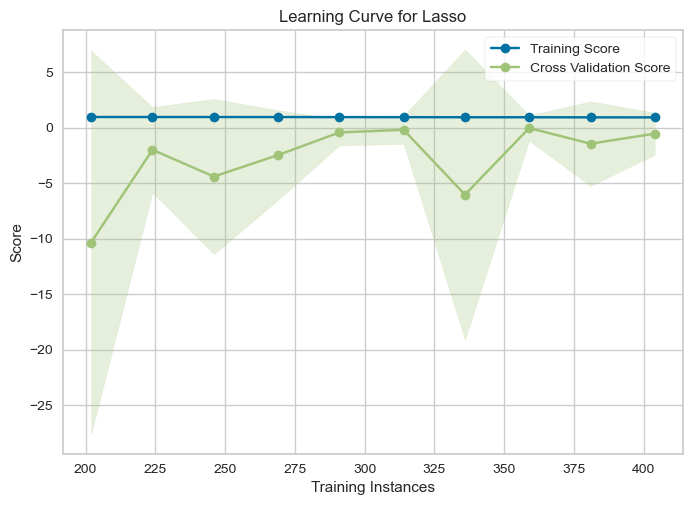

In [ ]:
visualizer = LearningCurve(
   Lasso(alpha=4*1e-4), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

Кривая для качественной модели($\alpha$ = \$0.005$\)

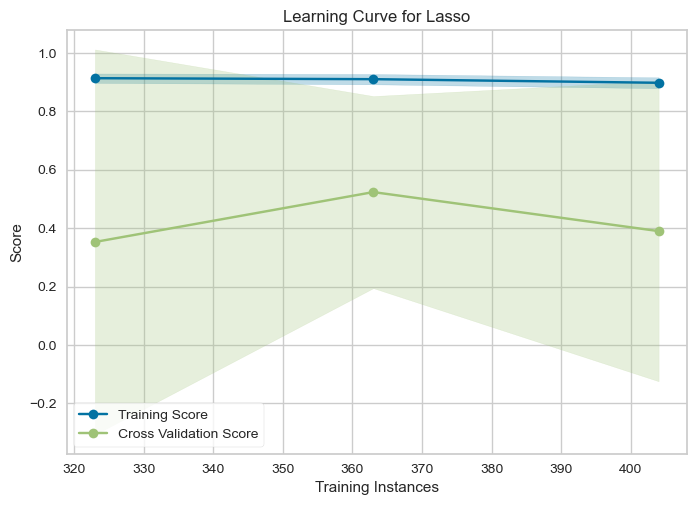

In [ ]:
visualizer = LearningCurve(
   Lasso(alpha=0.005), scoring='r2', train_sizes=np.linspace(0.8, 1.0, 3)
).fit(X, y) .show() 

### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.01)
elastic_net_model.fit(X_train, y_train)

y_pred = elastic_net_model.predict(X_test)
y_train_pred = elastic_net_model.predict(X_train)

print(f"Train r2_score: {elastic_net_model.score(X_train, y_train)}")
print(f"Test r2_score: {elastic_net_model.score(X_test, y_test)}")

Train r2_score: 0.8354145388874659
Test r2_score: 0.6975709513785231


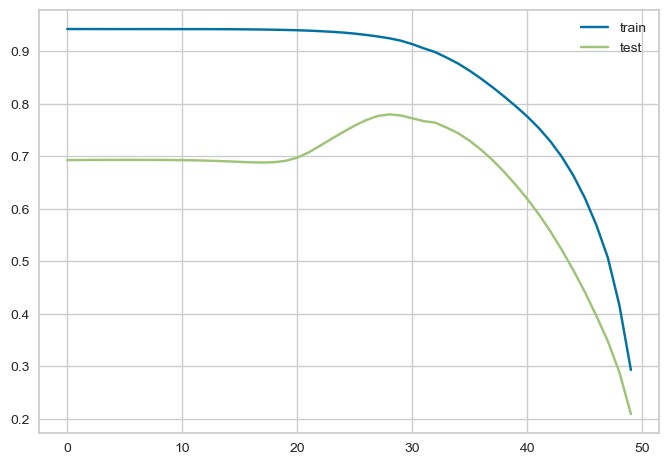

In [ ]:
trains = []
tests = []
for i in np.logspace(-8, 0, 50):
    elastic_net_model = ElasticNet(alpha=i, l1_ratio=i)
    elastic_net_model.fit(X_train, y_train)
    trains.append(elastic_net_model.score(X_train, y_train))
    tests.append(elastic_net_model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

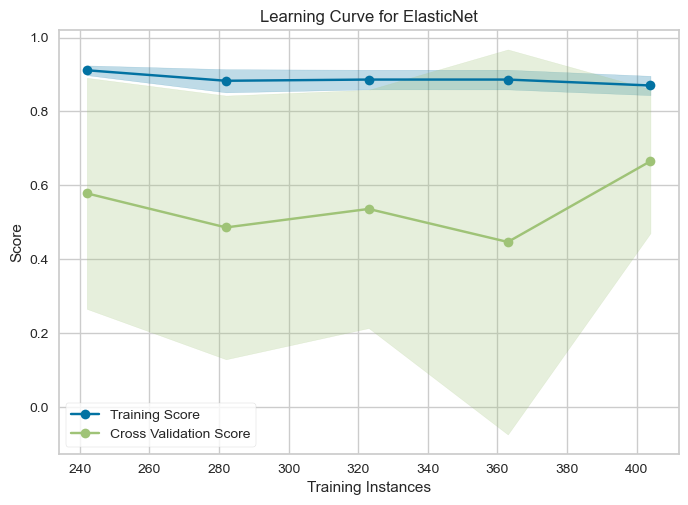

In [ ]:
visualizer = LearningCurve(
   ElasticNet(alpha=0.002, l1_ratio=0.002), scoring='r2', train_sizes=np.linspace(0.6, 1.0, 5)
).fit(X, y) .show() 

### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.


Загрузка данных

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f"Train score = {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test score = {accuracy_score(y_test, y_pred):.4f}")

Train score = 1.0000
Test score = 0.7273


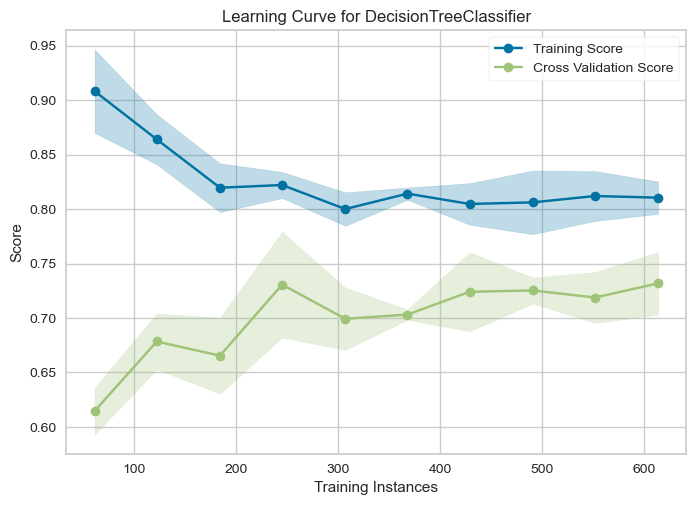

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

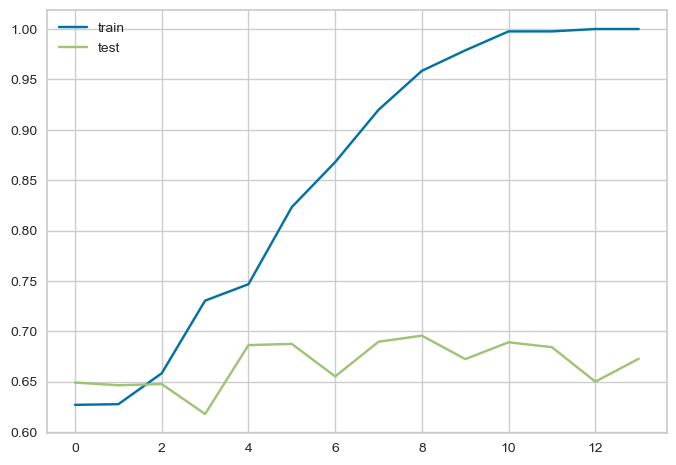

In [ ]:
trains = []
tests = []
for i in np.arange(1, 15):
    tree_model = DecisionTreeClassifier(max_depth=i)
    tree_model.fit(X_train, y_train)
    trains.append(f1_score(tree_model.predict(X_train), y_train))
    tests.append(f1_score(tree_model.predict(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [29]:
model = DecisionTreeClassifier(random_state=1, max_depth=11).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f"Train score = {f1_score(y_train, y_train_pred):.4f}")
print(f"Test score = {f1_score(y_test, y_pred):.4f}")

Train score = 0.9680
Test score = 0.7150


### 6. Повторите анализ на других реальных датасетах из репозитория OpenML:
    - phoneme
    - banknote-authentication
    - delta_ailerons
    - mammography
    - electricity
    - mozilla4
    - kropt
    - nursery
    - volcanoes-b3

In [30]:
from sklearn.datasets import fetch_openml

In [31]:
df = fetch_openml('electricity')
X = pd.DataFrame(df.data)
y = pd.DataFrame(df.target)
y['class'], _ = pd.factorize(y['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=151
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43945

  warn(warning_msg)
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:109: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/features/151. Retrying...
  warn(


In [32]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [33]:
print(f"Train score = {f1_score(y_train, y_train_pred):.4f}")
print(f"Test score = {f1_score(y_test, y_pred):.4f}")

Train score = 1.0000
Test score = 0.8970


In [34]:
cv_metrics = cross_validate(model, X, y, cv=5, scoring='f1_micro', return_train_score=True)

f1_train = cv_metrics['train_score'].mean()
f1_valid = cv_metrics['test_score'].mean()
print(f'Train f1-score = {f1_train:.4f}')
print(f'Valid f1-score = {f1_valid:.4f}')

Train f1-score = 1.0000
Valid f1-score = 0.6596


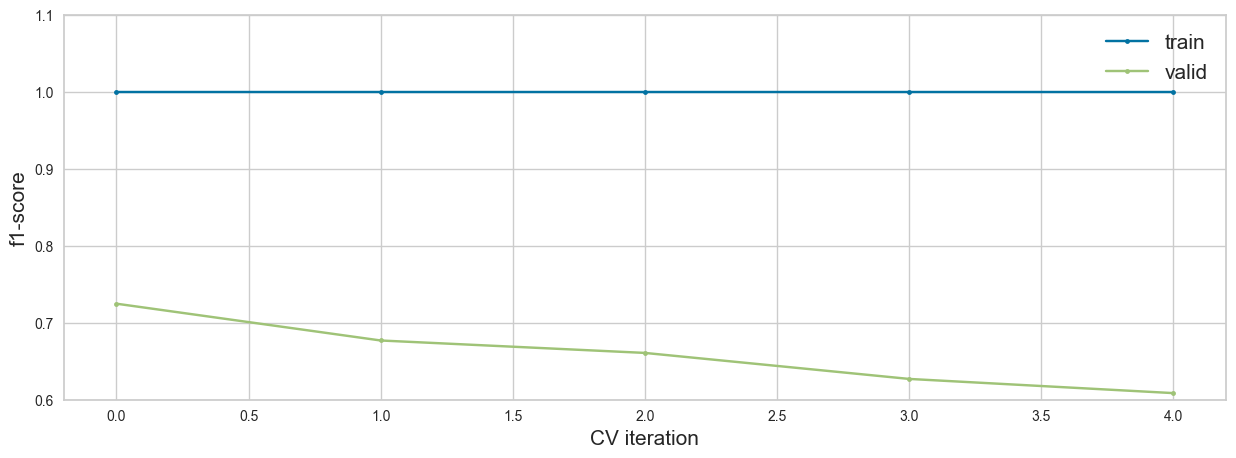

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='valid', marker='.')
plt.ylim([0.6, 1.1]);
plt.xlabel('CV iteration', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.legend(fontsize=15)
plt.show()

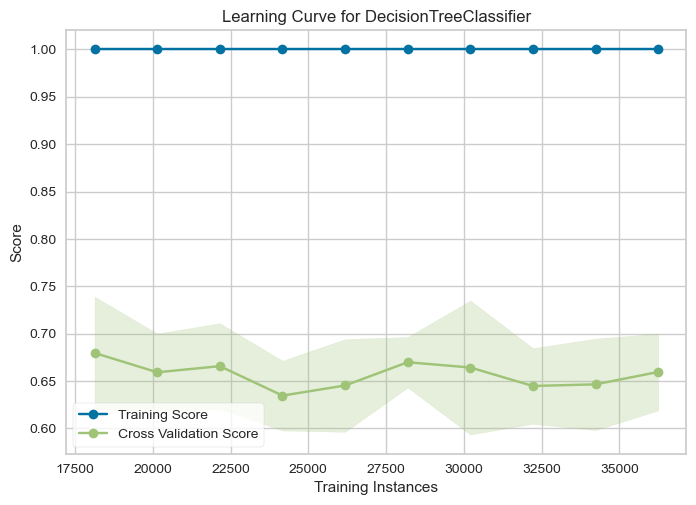

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1_micro'
).fit(X, y).show() 

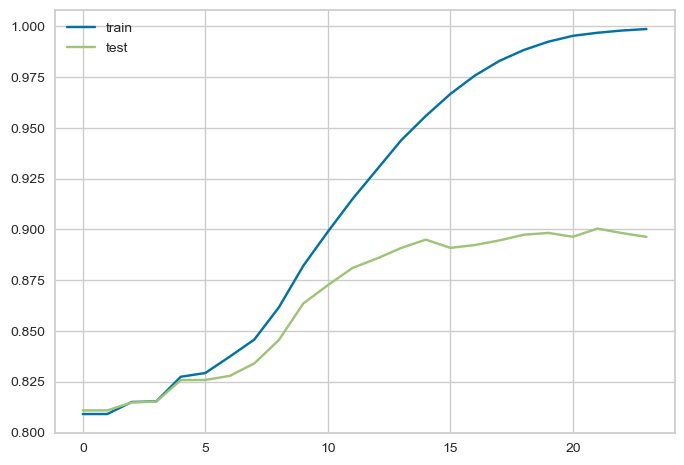

In [ ]:
trains = []
tests = []
for i in np.arange(1, 25):
    tree_model = DecisionTreeClassifier(max_depth=i)
    tree_model.fit(X_train, y_train)
    trains.append(f1_score(tree_model.predict(X_train), y_train))
    tests.append(f1_score(tree_model.predict(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [ ]:
model = DecisionTreeClassifier(random_state=1, max_depth=14)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(f"Train score = {f1_score(y_train, y_train_pred):.4f}")
print(f"Test score = {f1_score(y_test, y_pred):.4f}")

Train score = 0.9440
Test score = 0.8919
